In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
directory = 'log'
files = os.listdir(directory)


In [4]:
datas = []
for file in files:
    data = pd.read_csv(os.path.join(directory,file),header=None,names=['t','U','I'])
    datas.append(data)


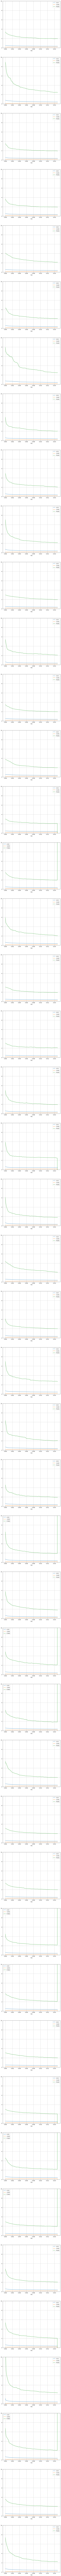

In [5]:
fig, axs = plt.subplots(len(datas), 1,sharex=False,figsize=(10, len(datas)*10))
for idx,ax in enumerate(axs.flat):
    data = datas[idx]
    ax.plot(data.t,data.U,label = '$U\ [V]$')
    ax.plot(data.t,data.I,label = '$I\ [mA]$')
    ax.plot(data.t,data.U/data.I, label = '$R\ [k\Omega]$')
    ax.set_ylim(0,10)
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('t[s]')

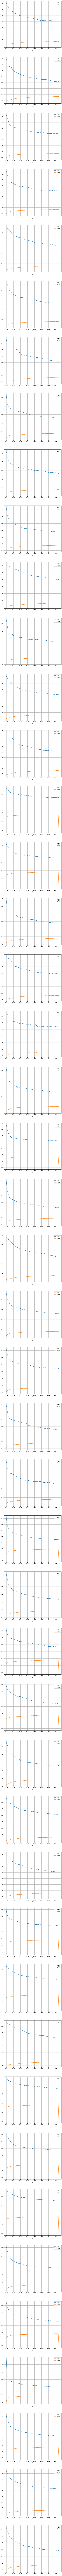

In [6]:
fig, axs = plt.subplots(len(datas), 1,sharex=False,figsize=(10, len(datas)*10))
for idx,ax in enumerate(axs.flat):
    data = datas[idx]
    ax.plot(data.t,data.U,label = '$U\ [V]$')
    ax.plot(data.t,data.I,label = '$I\ [mA]$')
    #ax.plot(data.t,data.U/data.I, label = '$R\ [k\Omega]$')
    #ax.set_ylim(0,10)
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('t[s]')

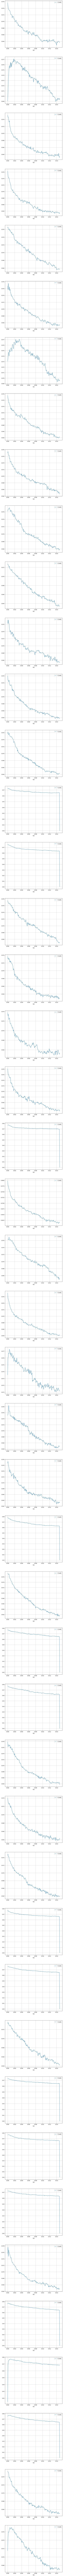

In [8]:
for data in datas:
    data["P"] = data['I']*data['U']
fig, axs = plt.subplots(len(datas), 1,sharex=False,figsize=(10, len(datas)*10))
for idx,ax in enumerate(axs.flat):
    data = datas[idx]
    ax.plot(data.t,data.P,label = '$P\ [mW]$')
    #ax.plot(data.t,data.I,label = '$I\ [mA]$')
    #ax.plot(data.t,data.U/data.I, label = '$R\ [k\Omega]$')
    #ax.set_ylim(0,10)
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('t[s]')